In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from utils.predictiveNet import PredictiveNet
import matplotlib.pyplot as plt
import numpy as np
from utils.general import saveFig
import itertools
import torch
import random
from utils.agent import RandomActionAgent
from analysis.representationalGeometryAnalysis import representationalGeometryAnalysis
from analysis.SpatialTuningAnalysis import SpatialTuningAnalysis



In [3]:
savefolder = 'Figures/thpRNN/'

In [4]:
#Example Net
netname = 'thcycRNN_5win'
#netname_1mask = 'thRNN_1win'
#exseed = 8
#netfolder = '/multisteptest/'
exseed = 107
netfolder = '/Theta_panel/'
predictiveNet = PredictiveNet.loadNet(netfolder
                                      +netname+'_full--s'+str(exseed))

Net Loaded from pathname


In [5]:
env = predictiveNet.EnvLibrary[0]
agentname = 'RandomActionAgent'
action_probability = np.array([0.15,0.15,0.6,0.1,0,0,0])
agent = RandomActionAgent(env.action_space,action_probability)
place_fields, SI, decoder = predictiveNet.calculateSpatialRepresentation(env,agent,
                                             trainDecoder=True,
                                            trainHDDecoder = True)

/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Training Decoder on cuda...
loss: 5.862686 [    0\ 5000]
loss: 0.970378 [  500\ 5000]
loss: 0.689392 [ 1000\ 5000]
loss: 0.562470 [ 1500\ 5000]
loss: 0.486138 [ 2000\ 5000]
loss: 0.431379 [ 2500\ 5000]
loss: 0.390172 [ 3000\ 5000]
loss: 0.360082 [ 3500\ 5000]
loss: 0.329728 [ 4000\ 5000]
loss: 0.309265 [ 4500\ 5000]
loss: 0.294446 [ 4999\ 5000]
Training Complete. Back to the cpu
Training Decoder on cuda...
loss: 1.497926 [    0\ 5000]
loss: 0.572125 [  500\ 5000]
loss: 0.392588 [ 1000\ 5000]
loss: 0.297626 [ 1500\ 5000]
loss: 0.242015 [ 2000\ 5000]
loss: 0.202541 [ 2500\ 5000]
loss: 0.174389 [ 3000\ 5000]
loss: 0.156311 [ 3500\ 5000]
loss: 0.139568 [ 4000\ 5000]
loss: 0.125491 [ 4500\ 5000]
loss: 0.114807 [ 4999\ 5000]
Training Complete. Back to the cpu


In [6]:
from analysis.decodeAnalysis import decodeAnalysis

In [7]:
dA = decodeAnalysis(predictiveNet,decoder=decoder,timesteps = 498)

Running WAKE


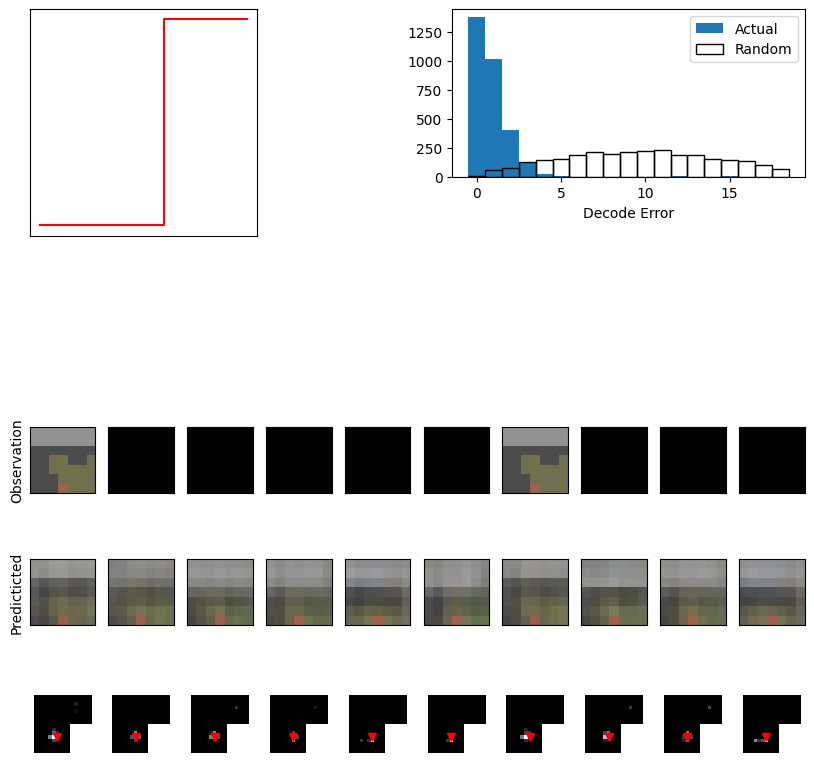

In [8]:
dA.decodeSequenceFigure(netname,savefolder)

In [9]:
STA = SpatialTuningAnalysis(predictiveNet,inputControl=False)

Running WAKE
Calculating EV_s


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


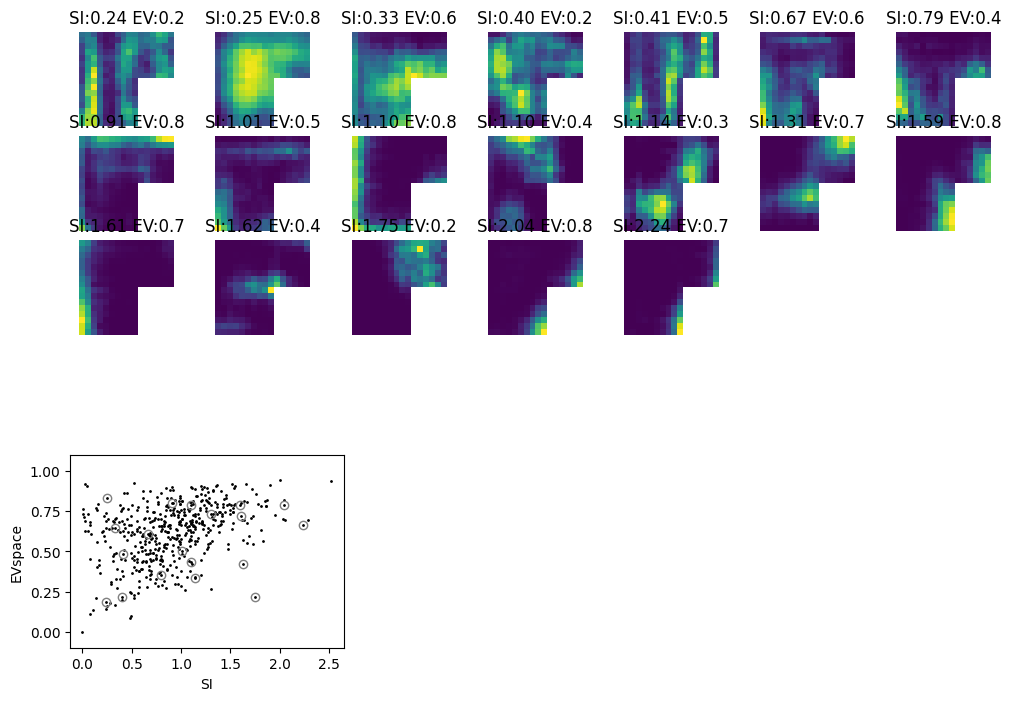

In [10]:
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

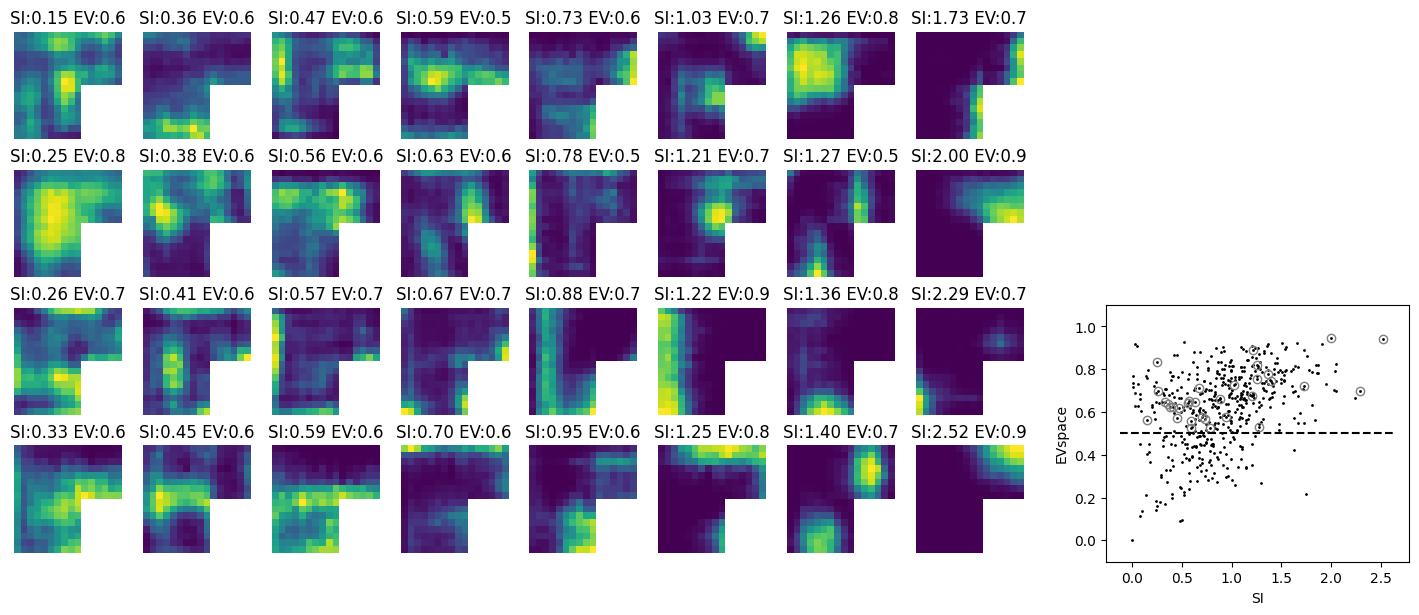

In [11]:
STA.TCExamplesFigure(netname,savefolder)

In [ ]:
RGA.

In [29]:
isomap_neighbors = 50
RGA = representationalGeometryAnalysis(predictiveNet,noisemag = 0, noisestd=0.1, 
                                       withIsomap=True,
                                       actRSA = False,obsRSA=False, HDRSA=False,
                                      theta='expand',
                                        n_neighbors = isomap_neighbors)

Running WAKE
Running SLEEP
Fitting Isomap


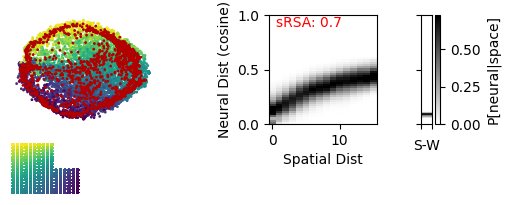

In [38]:
RGA.WakeSleepFigure(netname,savefolder)

In [12]:
from analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis
from analysis.DiffusionReplayAnalysis import DiffusionReplayAnalysis

basenoise = 0.03
plusnoise= 0.1

OTA = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=plusnoise,
                               withIsomap=False, decoder=decoder,
                               calculateViewSimilarity=True,compareWake=True)
DRA = DiffusionReplayAnalysis(predictiveNet, decoder = OTA.decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = plusnoise)

Running SLEEP
Running WAKE


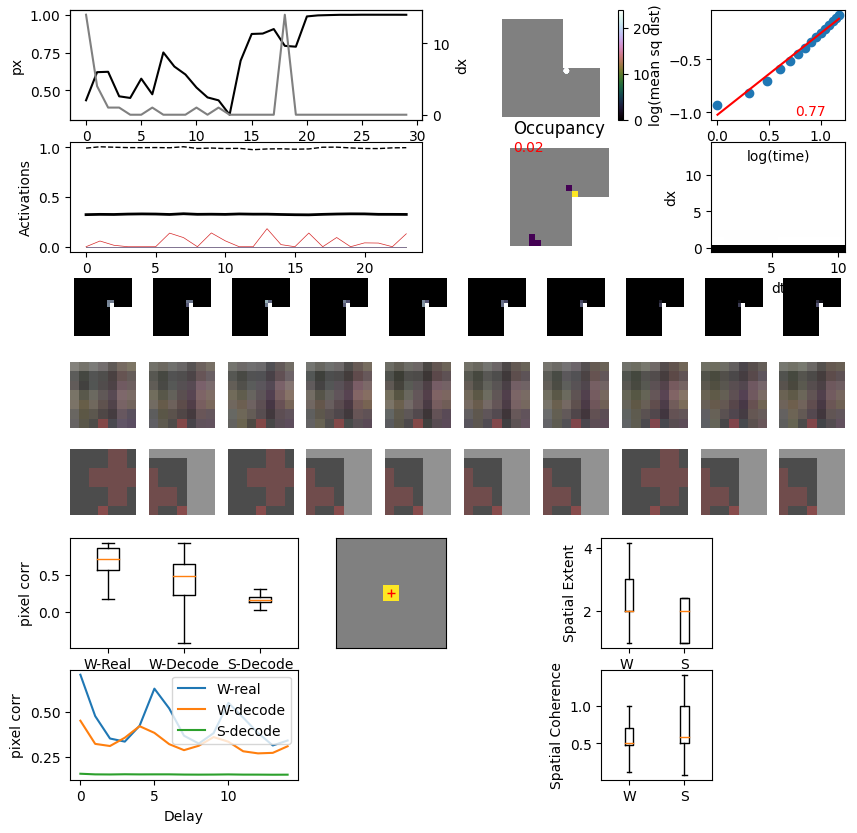

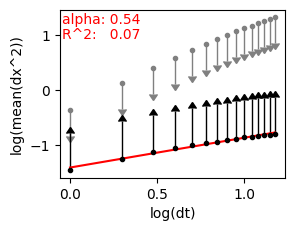

In [13]:
OTA.SpontTrajectoryFigure('noise',savefolder, trajRange=(250,275))
DRA.DiffusionFigure(netname+'noise', savefolder)

In [14]:
b_adapt = 1
tau_adapt=100

OTA_adapt = OfflineTrajectoryAnalysis(predictiveNet, 
                                      noisemag = 0, noisestd=basenoise,
                                   withIsomap=False, decoder=OTA.decoder, 
                                      withAdapt=True, 
                                      b_adapt = b_adapt, tau_adapt=tau_adapt,
                                     calculateViewSimilarity=True,compareWake=True)
DRA_adapt = DiffusionReplayAnalysis(predictiveNet, decoder = OTA.decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = basenoise,withAdapt=True,
                                    b_adapt = b_adapt, tau_adapt=tau_adapt)

Running SLEEP
Running WAKE


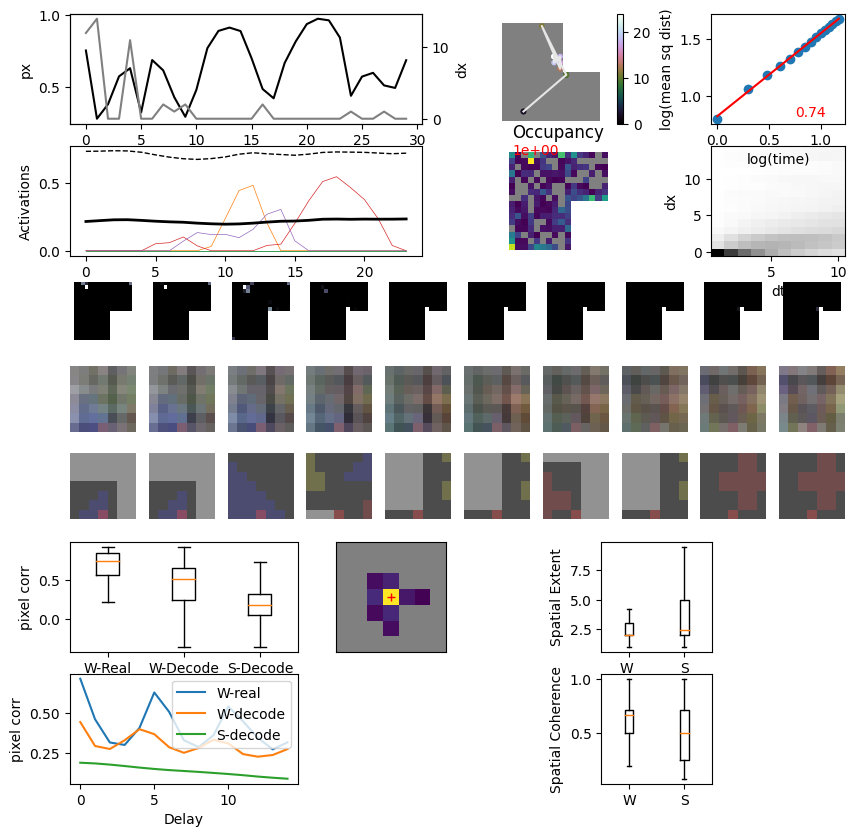

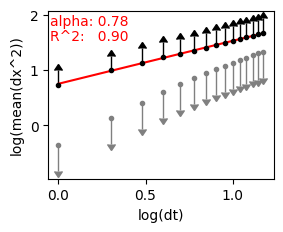

In [15]:
OTA_adapt.SpontTrajectoryFigure('adapt',savefolder, trajRange=(250,275))
DRA_adapt.DiffusionFigure(netname+'adapt', savefolder)

In [16]:

OTA_HDadapt = OfflineTrajectoryAnalysis(predictiveNet, 
                                      noisemag = 0, noisestd=basenoise,
                                   withIsomap=False, decoder=OTA.decoder, 
                                      actionAgent='HDOnly', withAdapt=True, 
                                      b_adapt = b_adapt, tau_adapt=tau_adapt,
                                     calculateViewSimilarity=True,compareWake=True)
DRA_HDadapt = DiffusionReplayAnalysis(predictiveNet, decoder = OTA.decoder,
                            compareWake=True, actionAgent='HDOnly',
                              noisestd = basenoise,withAdapt=True,
                                    b_adapt = b_adapt, tau_adapt=tau_adapt)

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


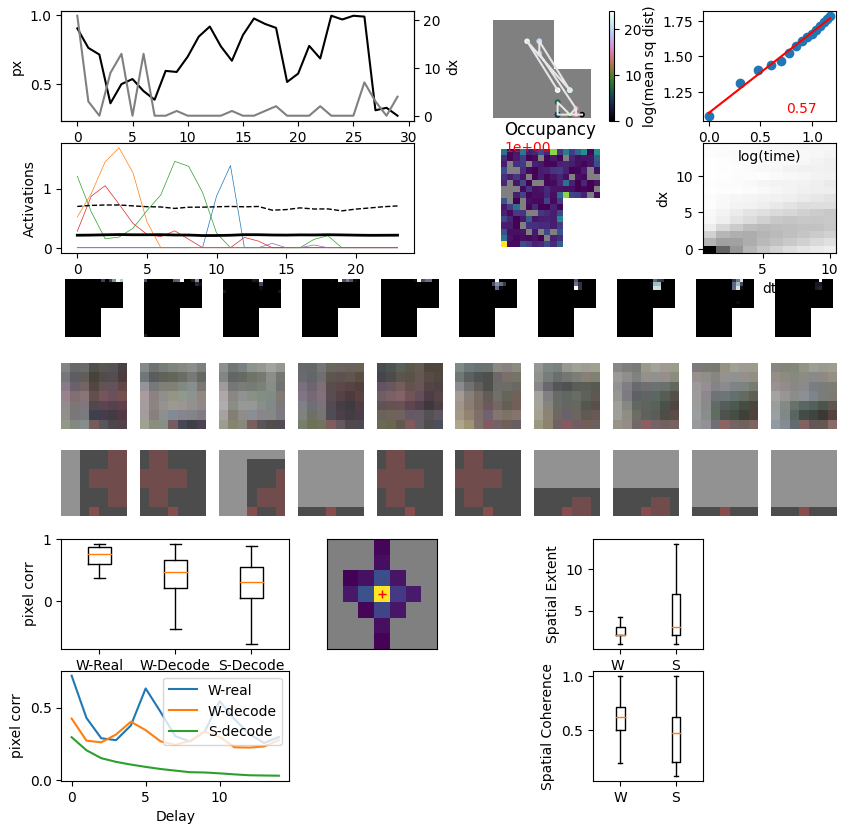

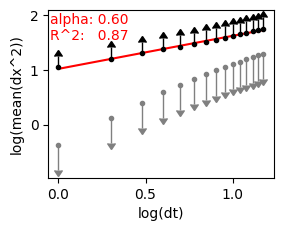

In [17]:
OTA_HDadapt.SpontTrajectoryFigure('HDadapt',savefolder, trajRange=(250,275))
DRA_HDadapt.DiffusionFigure(netname+'HDadapt', savefolder)

In [41]:
OTA_query = OfflineTrajectoryAnalysis(predictiveNet, 
                                      noisemag = 0, noisestd=basenoise,
                               withIsomap=False, decoder=OTA.decoder,
                                     actionAgent=True,calculateViewSimilarity=True,
                               compareWake=True)
DRA_query = DiffusionReplayAnalysis(predictiveNet, decoder = OTA.decoder,
                            compareWake=True, actionAgent=True,
                              noisestd = basenoise)

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


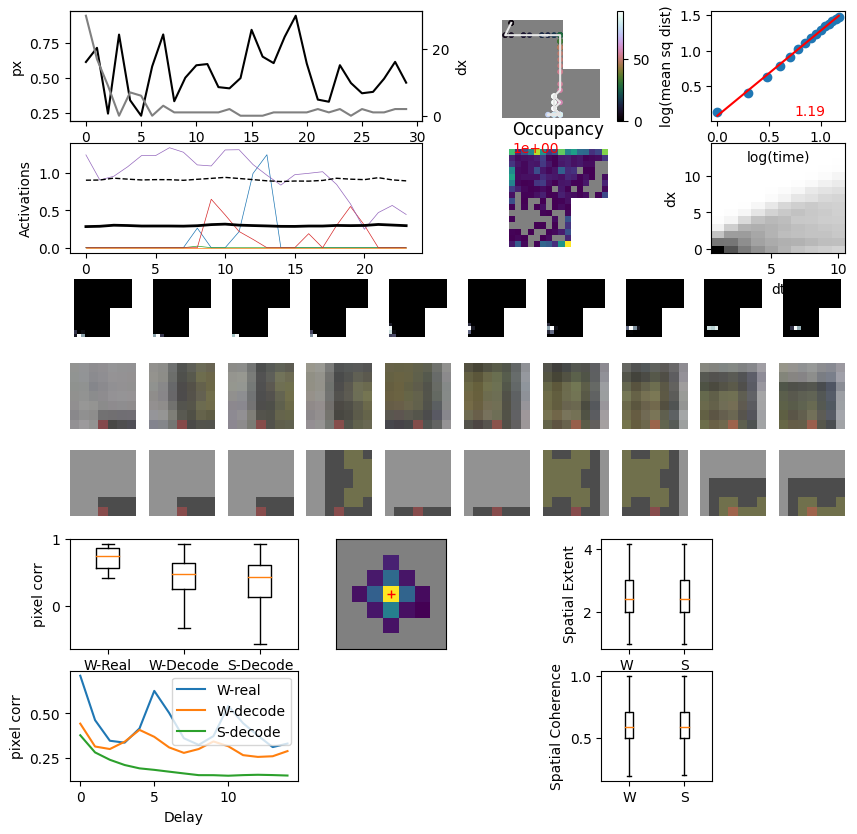

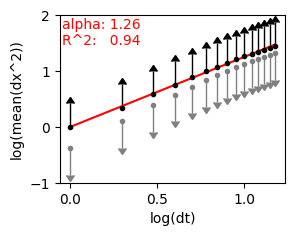

In [54]:
OTA_query.SpontTrajectoryFigure('query',savefolder, trajRange=(610,700))
#OTA_query.SpontTrajectoryFigure('query2',savefolder, trajRange=(215,240))
#OTA_query.SpontTrajectoryFigure('query3',savefolder, trajRange=(235,240))

DRA_query.DiffusionFigure(netname+'query', savefolder)

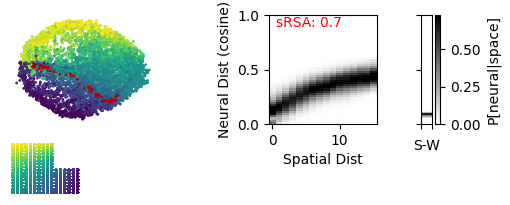

In [58]:
RGA.SLEEPactivity['h'] = OTA_query.SLEEPactivity['h'].detach().numpy().squeeze()[620:700,:]
RGA.WakeSleepFigure(netname+'query',savefolder)

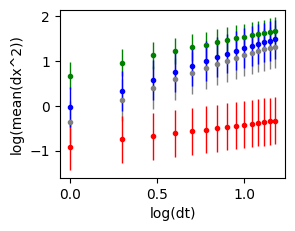

In [152]:
plt.figure()
plt.subplot(2,2,1)
DRA.diffusionFitPanel(DRA.delays, DRA.msd, None, DRA.msd_WAKE,
                       showTrialPoints=False, halflims=False, color='r')
DRA_adapt.diffusionFitPanel(DRA_adapt.delays, DRA_adapt.msd, None, None,
                       showTrialPoints=False, halflims=False, color='g')
#DRA_adaptHD.diffusionFitPanel(DRA_adaptHD.delays, DRA_adaptHD.msd, None, None,
#                       showTrialPoints=False, halflims=False, color='b')
DRA_query.diffusionFitPanel(DRA_query.delays, DRA_query.msd, None, None,
                       showTrialPoints=False, halflims=False, color='b')

saveFig(plt.gcf(),'CompareNets_Alpha',savefolder,
        filetype='pdf')

In [31]:
place_fields_m, SI_m, decoder_m = predictiveNet.calculateSpatialRepresentation(env,agent,timesteps=15000,
                                            calculatesRSA = False,
                                            saveTrainingData=False,
                                            trainDecoder=True)

/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Training Decoder on cuda...
loss: 5.894894 [    0\ 5000]
loss: 0.965952 [  500\ 5000]
loss: 0.690545 [ 1000\ 5000]
loss: 0.555500 [ 1500\ 5000]
loss: 0.475822 [ 2000\ 5000]
loss: 0.427276 [ 2500\ 5000]
loss: 0.380858 [ 3000\ 5000]
loss: 0.345704 [ 3500\ 5000]
loss: 0.318398 [ 4000\ 5000]
loss: 0.301699 [ 4500\ 5000]
loss: 0.280807 [ 4999\ 5000]
Training Complete. Back to the cpu


In [17]:
timesteps = 2000
obs,act,state,render = predictiveNet.collectObservationSequence(env,agent,
                                                       timesteps,
                                                       includeRender=False)
obs_pred, obs_next, h  = predictiveNet.predict(obs,act)

In [18]:
def alignPositionToAgent (x_decoded, y_decoded, HD, x_pos=0, y_pos=0):
    """
    Rotates a point in the xy-plane counterclockwise through an angle about the origin
    https://en.wikipedia.org/wiki/Rotation_matrix
    :param x: x coordinate
    :param y: y coordinate
    :param x_shift: x-axis shift from origin (0, 0)
    :param y_shift: y-axis shift from origin (0, 0)
    :param angle: The rotation angle in degrees
    :param units: DEGREES (default) or RADIANS
    :return: Tuple of rotated x and y
    """

    angle = -HD*np.pi/2 - np.pi
    # Shift to origin (0,0)
    x = x_decoded - x_pos
    y = y_decoded - y_pos

    # Convert degrees to radians
    #if units == "DEGREES":
    #    angle = math.radians(angle)

    # Rotation matrix multiplication to get rotated x & y
    xr = (x * np.cos(angle)) - (y * np.sin(angle))
    yr = (x * np.sin(angle)) + (y * np.cos(angle))

    return xr, yr

In [19]:
def alignOneDecodeToAgent(decode_p, HD, x_pos, y_pos):
    #Center to x_pos,y_pos
    padX = [decode_p.shape[1] - y_pos, y_pos+1]
    padY = [decode_p.shape[0] - x_pos, x_pos+1]
    imgP = np.pad(decode_p, [padY, padX], 'constant')
    
    #Rotate the appropriate amount
    imgP = np.rot90(imgP, k=-HD-2, axes=(0, 1))
    return imgP

def alignDecodeToAgent(decode_p, HD, x_pos, y_pos):
    imgP = []
    for idx in range(decode_p.shape[0]):
         imgP.append(alignOneDecodeToAgent(decode_p[idx,:,:], HD[idx], x_pos[idx], y_pos[idx]))
    
    imgP = np.stack(imgP)
    return imgP

In [20]:
k = 5
thetas = np.arange(k+1)
locoffsets = np.arange(k+1)
meanerror = np.zeros((k+1,k+1))

transrange = 3
poshist = np.zeros((2*transrange+1,2*transrange+1,k+1,k+1)) 

decode_p = np.zeros((37,37,k+1,k+1)) 

for thidx,theta in enumerate(thetas):
    for locidx, locoffset in enumerate(locoffsets):
        #theta = 0
        #locoffset = 0
        h_theta= h[theta:theta+1,:-1,:]
        decoded, p = predictiveNet.decode(h_theta,decoder)
        state_offset = {'agent_pos': state['agent_pos'][locoffset:decoded.shape[0]+1+locoffset,:],
                        'agent_dir': state['agent_dir'][locoffset:decoded.shape[0]+1+locoffset]}
        derror, _ = predictiveNet.decode_error(decoded, state_offset)
        meanerror[locidx,thidx] = np.mean(derror)
        
        #Note: this is mean of decoded locations.
        #Should also look at mean p[location]
        xr, yr = alignPositionToAgent(decoded.x.values,decoded.y.values,
                               state_offset['agent_dir'][:-1],
                               state_offset['agent_pos'][:-1,0],
                               state_offset['agent_pos'][:-1,1])
        
        bins = np.linspace(-transrange-0.5,transrange+0.5,2*transrange+2)
        poshist[:,:,locidx,thidx],edges,_ = np.histogram2d(xr,yr,bins)
        
        
        aligned_p = alignDecodeToAgent(p,
                           state_offset['agent_dir'][:-1],
                           state_offset['agent_pos'][:-1,0],
                           state_offset['agent_pos'][:-1,1])
        
        decode_p[:,:,locidx,thidx] = np.nanmean(aligned_p,axis=0)
        
        

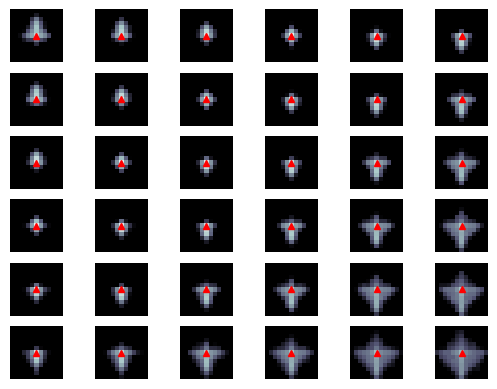

In [21]:
plt.figure()
idx = 0 
#locidx=0
for thidx,theta in reversed(list(enumerate(thetas))):
    for locidx, locoffset in enumerate(locoffsets):
        idx+=1
        plt.subplot(6,6,idx)
        plt.imshow(np.log10(decode_p[12:-12,12:-12,locidx,thidx]),
                   extent=(edges[0],edges[-1],
                           edges[0],edges[-1]),
                  cmap='bone',vmin=-3.25,vmax=0)
        plt.plot(0,0,'r^',markersize=5)
        plt.axis('off')
    
saveFig(plt.gcf(),'DecodePOffset',savefolder,
        filetype='pdf')
plt.show()

In [82]:
nettypes = ['thRNN_5win','thcycRNN_5win_full']
durs = ['12','25','50','100','200','400','800']
masks = ['']
seed = ['100','102','103','104','105','106','107','108']

netprops = itertools.product(*[nettypes,['-'],durs,['-s'],seed])
netprops = list(netprops)
netnames = [''.join(name) for name in netprops]
nettype = [name[0] for name in netprops]
netdur = [name[2] for name in netprops]
netseed = [int(name[4]) for name in netprops]

netk = [int(name[2]) for name in netprops]
netfolder = '/theta_seqdur/'

analysisFrame = pd.DataFrame(data={'filename':netnames, 'type':nettype, 'dur':netdur,
                                   'seed':netseed, 'netfolder':netfolder})

In [83]:
def loadNet(row):
    try:
        net = PredictiveNet.loadNet(row['netfolder']+row['filename'],suppressText=True)
        return net
    except:
        print(f"{row['filename']} does not exist")
        net = PredictiveNet
        

analysisFrame['net'] = analysisFrame.apply(loadNet, axis = 1)


In [122]:
#Calculate spatial info and decoding performance
def getSpatialRep(row):
    #predictiveNet = loadNet(row)
    predictiveNet = row['net']
    SI = predictiveNet.TrainingSaver['SI'].values[-1]
    sRSA = predictiveNet.TrainingSaver['sRSA'].values[-1]
    meanSI = np.nanmean(SI)
    

    try:
        EVs = predictiveNet.TrainingSaver['EVs'].values[-1]
        EVsp50 = np.nanmean(EVs>0.5)
        EVs_nanfree = EVs[~np.isnan(EVs)]
    except:
        EVs = np.array([np.nan,np.nan])
        EVsp50 = np.nan
        EVs_nanfree = np.array([np.nan,np.nan])
    
    try:
        SWdist = predictiveNet.TrainingSaver['SWdist'].values[-1]
    except:
        SWdist = np.nan
    
    sRSA_train = np.empty(100) * np.nan 
    sRSA_train_temp = predictiveNet.TrainingSaver['sRSA'].values
    sRSA_train_temp = sRSA_train_temp[~np.isnan(sRSA_train_temp)]
    sRSA_train[:sRSA_train_temp.size] = sRSA_train_temp
    
    #SI_train = predictiveNet.TrainingSaver['SI'].values
    #SI_train = SI_train[~np.isnan(SI_train)]
    
    #alpha_train = predictiveNet.TrainingSaver['replay_alpha'].values
    #alpha_train = SI_train[~np.isnan(alpha_train)]
        
    finalLoss = predictiveNet.TrainingSaver['loss'].values[-1]
    logFinalLoss = np.log10(finalLoss)
    
    return SI, meanSI, sRSA,EVs, EVs_nanfree, EVsp50, finalLoss, SWdist, sRSA_train, logFinalLoss
analysisFrame[['SI','meanSI','sRSA','EVs_all','EVs','EVs50','finalLoss','SWdist','sRSA_train','logFinalLoss']] = analysisFrame.apply(getSpatialRep, axis = 1, result_type="expand")

In [123]:
#analysisFrame['net'][0].trainArgs
def getTrainParms(row):
    predictiveNet = row['net']
    lr = predictiveNet.trainArgs.lr
    seed = predictiveNet.trainArgs.seed
    weight_decay = predictiveNet.trainArgs.weight_decay
    bptttrunc = predictiveNet.trainArgs.bptttrunc
    seqdur = predictiveNet.trainArgs.seqdur
    dropp = predictiveNet.trainArgs.dropout
    ntimescale = predictiveNet.trainArgs.ntimescale
    nneurons = predictiveNet.trainArgs.hiddensize
    noisestd = predictiveNet.trainArgs.noisestd
    
    return lr,bptttrunc,seqdur,seed,dropp,ntimescale,weight_decay,nneurons,noisestd
analysisFrame[['lr','bptt','seqdur','seed','dropp','ntimescale','weight_decay','nneurons','noisestd']] = analysisFrame.apply(getTrainParms, axis = 1, result_type="expand")

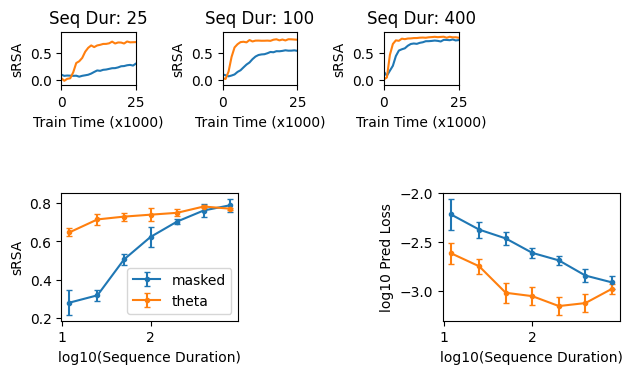

In [128]:
netnames = ['masked','theta']

plt.figure()
for aidx,act in enumerate(analysisFrame['type'].unique()):
    data = analysisFrame[analysisFrame['type']==act][['seqdur','sRSA','SWdist','logFinalLoss']]
    panel = data.groupby('seqdur',sort=False).agg([np.mean, np.std])
    
    plt.subplot(2,2,3)
    #plt.plot(np.log10(data['seqdur']),data['sRSA'],label=act)
    plt.errorbar(np.log10(panel.index),panel['sRSA']['mean'], 
                     panel['sRSA']['std'],
                capsize=2,fmt='.-',label=netnames[aidx])
    plt.xlabel('log10(Sequence Duration)')
    plt.ylabel('sRSA')
    #plt.ylim([0.2, 0.8])
    plt.legend()
    
    plt.subplot(2,2,4)
    #plt.plot(np.log10(data['seqdur']),data['sRSA'],label=act)
    plt.errorbar(np.log10(panel.index),panel['logFinalLoss']['mean'], 
                     panel['logFinalLoss']['std'],
                capsize=2,fmt='.-',label=netnames[aidx])
    plt.xlabel('log10(Sequence Duration)')
    plt.ylabel('log10 Pred Loss')
     
    for didx,dur in enumerate(analysisFrame['dur'].unique()):
        if didx % 2 == 0:
            continue
        else:
            data = analysisFrame[(analysisFrame['type']==act) & (analysisFrame['dur']==dur) ]
            plt.subplot(4,4,int(didx/2)+1+4)
            #plt.plot(data['sRSA_train'].values[0])
            plt.plot(np.mean(data['sRSA_train'].values))
            plt.ylabel('sRSA')
            plt.xlabel('Train Time (x1000)')
            plt.title(f"Seq Dur: {dur}")
            plt.ylim([-0.1, 0.9])
            plt.xlim([0,25])
            #plt.xlim([0, 40])

    
plt.tight_layout()
saveFig(plt.gcf(),'ThetaSequenceDuration',savefolder,
        filetype='pdf')
plt.show()

In [42]:
exseed = 102
exampleNet_mask = analysisFrame[(analysisFrame.dur=='400') & 
                           (analysisFrame.type=='thRNN_5win') &
                           (analysisFrame.seed==exseed)].net.values[0]
exampleNet_rollout = analysisFrame[(analysisFrame.dur=='400') & 
                           (analysisFrame.type=='thcycRNN_5win_full') &
                           (analysisFrame.seed==exseed)].net.values[0]

In [43]:
env = exampleNet_mask.EnvLibrary[0]
agentname = 'RandomActionAgent'
action_probability = np.array([0.15,0.15,0.6,0.1,0,0,0])
agent = RandomActionAgent(env.action_space,action_probability)
place_fields, SI, decoder = exampleNet_mask.calculateSpatialRepresentation(env,agent,
                                             trainDecoder=True)

Training Decoder on cuda...
loss: 5.827289 [    0\ 5000]
loss: 1.316487 [  500\ 5000]
loss: 1.009771 [ 1000\ 5000]
loss: 0.848167 [ 1500\ 5000]
loss: 0.736518 [ 2000\ 5000]
loss: 0.667031 [ 2500\ 5000]
loss: 0.608162 [ 3000\ 5000]
loss: 0.556597 [ 3500\ 5000]
loss: 0.517797 [ 4000\ 5000]
loss: 0.489374 [ 4500\ 5000]
loss: 0.461426 [ 4999\ 5000]
Training Complete. Back to the cpu


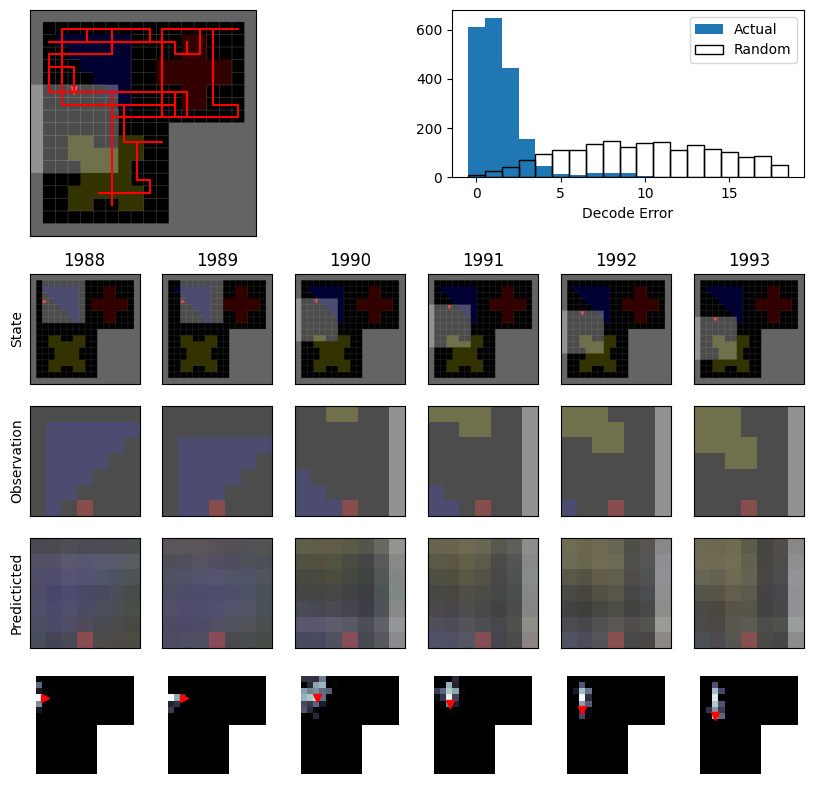

In [14]:
exampleNet_mask.calculateDecodingPerformance(env,agent,decoder,
                                            savename=netname+'400', savefolder=savefolder,
                                          trajectoryWindow=400)

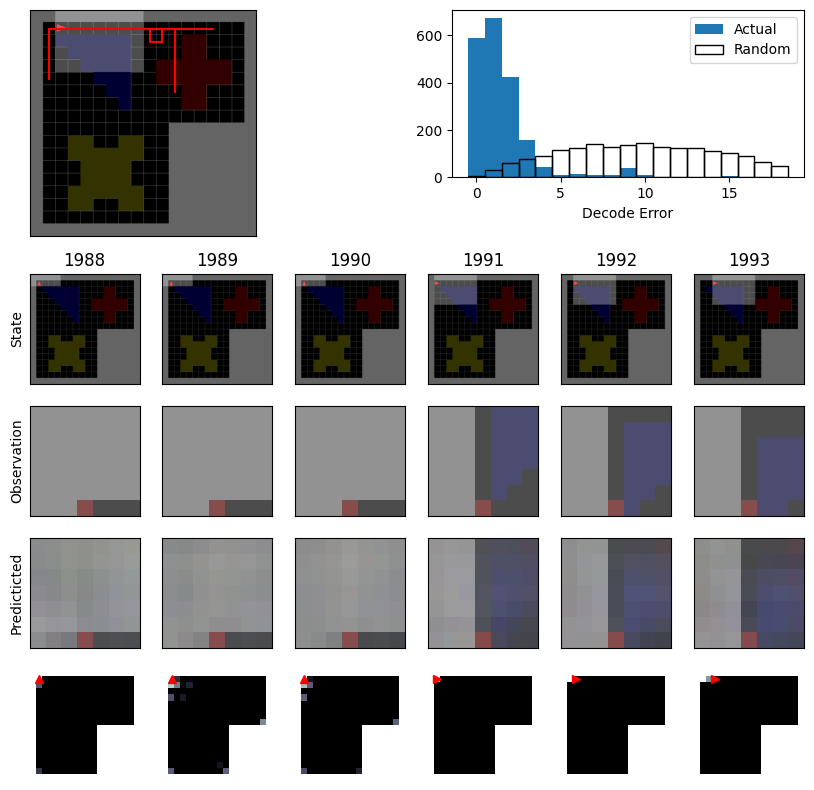

In [15]:
exampleNet_mask.calculateDecodingPerformance(env,agent,decoder,
                                            savename=netname+'100', savefolder=savefolder,
                                          trajectoryWindow=100)

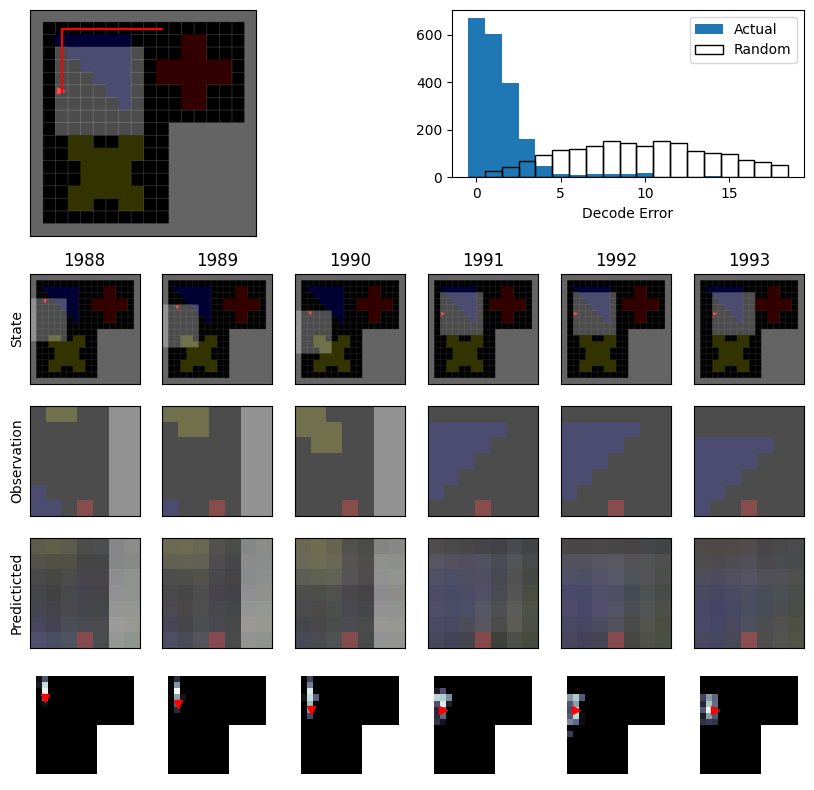

In [17]:
exampleNet_mask.calculateDecodingPerformance(env,agent,decoder,
                                            savename=netname+'25', savefolder=savefolder,
                                          trajectoryWindow=25)